In [1]:
from pylab import *
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:

#time which we want to analyze
Y=3. # number of years
dY=52. # intervals of years (supposing equal onboarding probability throughout the year)

#Average € per investors
T=10000 #average € investment per company
tokenscale=1000000 #resize € scale
Threshold=5000000/tokenscale #initial tokens
Goal =400 #Threshold of companies in a field

In [3]:
#stuff needed for the program to run

S=int(Y*dY) # number of steps
Years=[0]*S
#N=[0]*S
# Inv=[0]*S #new investors
# InvTot=[0]*(S+2)  #total investors
rev=[0]*S #Total revenue
for t in range(0,S):
    Years[t]=t/dY #+2022

def show(InvTot):
     return plot(InvTot[S+1],InvTot[S], marker="o", markersize=5 )#,axvline(x=InvTot[S+1], ymin=0.0, ymax=Goal)

In [4]:
# #N[1-e^(-t*R)]  where N is the total number of companies and R is the probability they join
# def model(ind):
#     #introduce delay
#     Delay=1+int(ind[2]*dY)
#     #clean new arrays
#     Inv=[0]*S #new investors
#     InvTot=[0]*(S+2) #Total investors per time
#     N=ind[0] #[0]*S #Number of total companies remaining
#     #initialize them
#     #N[Delay-1]=ind[0]*ind[1] # the possible inverstors are the percentage on the total companies
#     Inv[0]=0
#     R=ind[1]/dY  #we assume 10% grow each year so out of 5000 companies 500
#     #Delay=1+int(ind[2]*dY)
#     #print(Delay)
#     for t in range(Delay,S):
#         #R=R+(randn()/1000)     ## uncomment to add fluctuations
#         Inv[t]=N*R
#         InvTot[t]=(InvTot[t-1] + Inv[t])   
#         #N[t]=(N[t-1] - Inv[t]) 
#         rev[t]=InvTot[t]*(T/tokenscale) +rev[t]
#         #R=R + InvTot[t]/1000000
#         R=R + InvTot[t]/dY

# #When do we reach the goal of investors in each industry?        
#         if InvTot[t] <= Goal:  
#             InvTot[S]=InvTot[t]
#             InvTot[S+1]=t/dY 
#     #show(InvTot)        
#     return InvTot #number of total investors per period of time

In [5]:
#N[1-e^(-t*R)]  where N is the total number of companies and R is the probability they join
def model(ind):
    #introduce delay
    Delay=1+int(ind[2]*dY)
    #clean new arrays
    Inv=[0]*S #new investors
    InvTot=[0]*(S+2) #Total investors per time
    N=[0]*S #Number of total companies remaining
    #initialize them
    N[Delay-1]=ind[0]*ind[1] # the possible inverstors are the percentage on the total companies
    Inv[0]=0
    R=ind[1]/(dY)  #we assume investors decide in the first 5 years equally distributed 
    #Delay=1+int(ind[2]*dY)
    #print(Delay)
    #P=0.1
    for t in range(Delay,S):
        #R=R+(randn()/1000)     ## uncomment to add fluctuations
        Inv[t]=N[t-1]*R
        InvTot[t]=(InvTot[t-1] + Inv[t])   
        N[t]=(N[t-1] - Inv[t]) 
        rev[t]=InvTot[t]*(T/tokenscale) +rev[t]
        R=R + N[t]/(1000000)
        #print(InvTot[t])
        #print(R)
        #print(R + InvTot[t]/(1000*dY))
        #print(rev[t])
#When do we reach the goal of investors in each industry?        
        if InvTot[t] <= Goal:  
            InvTot[S]=InvTot[t]
            InvTot[S+1]=t/dY 
    #scatter(x=Delay/dY, y = rev[Delay],color='black') 
    
    return InvTot #number of total investors per period of time

In [6]:
#All the scenarios have the following suppositions
#1: given an industry, we expect the 10% of companies to join 
#2: The investors are spread in a 5 years periods


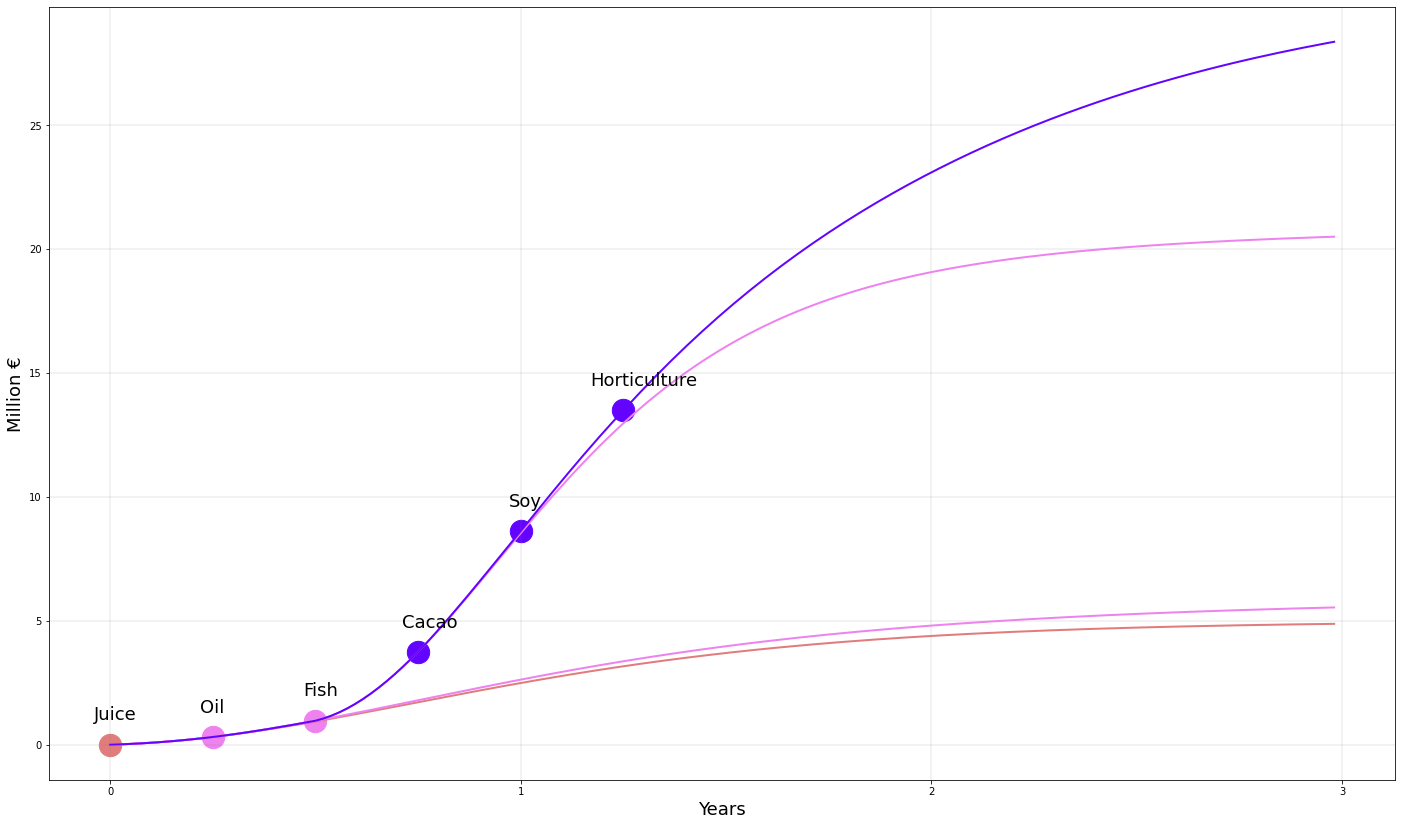

In [7]:
fig=figure(figsize=(20,12))


# # int(ind[2]*dY)ed
# Juice      =       [   5000    ,   1/10  ,   0. ]
# Soy        =       [   7000    ,   1/10  ,   1. ]
# Fish       =       [   12000   ,   1/10  ,   2. ]
# OliveOil   =       [   10000   ,   1/10  ,   3. ]
# Cacao      =       [   5000    ,   1/10  ,   4. ]
# Coffee     =       [   5000    ,   1/10  ,   5. ]


Juice        =     [   5000    ,   1/10  ,   0.   ]
OliveOil     =     [   1000    ,   1/10  ,   0.25 ]
Fish         =     [   15000   ,   1/10  ,   0.50 ]
Cacao        =     [   2000    ,   1/10  ,   0.75 ]
Soy          =     [   5000    ,   1/10  ,   1.   ]
Floriculture =     [   3000    ,   1/10  ,   1.25 ]

#Simultaneous
# Juice      =       [   5000    ,   1/10  ,   0. ]
# Soy        =       [   7000    ,   1/10  ,   0. ]
# Fish       =       [   12000   ,   1/10  ,   0. ]
# OliveOil   =       [   10000   ,   1/10  ,   0. ]
# Cacao      =       [   5000    ,   1/10  ,   0. ]
# Coffee     =       [   5000    ,   1/10  ,   0. ]


rev=[0]*S
JuicyChain=model(Juice)
scatter(x=int(Juice[2]*dY)/dY, y = rev[ int(Juice[2]*dY)], color='#e07c7c',s=500,)
text(-0.04, 1,'Juice', fontsize=18)
plot(Years, rev,label='Worst case scenario', color='#e07c7c',linewidth=2)
#text(2.5,5.5,'Worst case scenario',fontsize=18)

OliveChain=model(OliveOil)
plot(Years, rev,label='Base case scenario', linewidth=2,color='violet')
scatter(x= int(OliveOil[2]*dY)/dY, y = rev[ int(OliveOil[2]*dY)],color='violet' ,s=500)
text( int(OliveOil[2]*dY)/dY -0.03,  rev[ int(OliveOil[2]*dY)] +1,'Oil' ,fontsize=18)
#plot(Years, rev,label='Olive Oil industry adoption',linewidth=2,color='olive')

FishChain=model(Fish)
scatter(x= int(Fish[2]*dY)/dY, y = rev[ int(Fish[2]*dY)] ,color='violet',s=500)
text(int(Fish[2]*dY)/dY -0.03,  rev[ int(Fish[2]*dY)] +1,'Fish',fontsize=18)
plot(Years, rev,label='Base case scenario', linewidth=2,color='violet')
#text(2.5,21 , 'Base case scenario',fontsize=18)

CacaoChain=model(Cacao)
scatter(x= int(Cacao[2]*dY)/dY, y = rev[ int(Cacao[2]*dY)] ,color='#6204ff',s=500)
text(int(Cacao[2]*dY)/dY -0.04,  rev[ int(Cacao[2]*dY)] +1,'Cacao',fontsize=18)
#plot(Years, rev, label='Cacao industry adoption',linewidth=2,color='chocolate')

SoyChain=model(Soy)
scatter(x=int(Soy[2]*dY)/dY, y = rev[ int(Soy[2]*dY)] ,color='#6204ff',s=500)
text(int(Soy[2]*dY)/dY -0.03, 1+ rev[ int(Soy[2]*dY)] ,'Soy',fontsize=18)
#plot(Years, rev,label='Soy industry adoption', linewidth=2 ,color='green')


FlowerChain=model(Floriculture)
scatter(x= int(Floriculture[2]*dY)/dY, y = rev[ int(Floriculture[2]*dY)],color='#6204ff' ,s=500)
text( int(Floriculture[2]*dY)/dY -0.08, 1+ rev[ int(Floriculture[2]*dY)],'Horticulture' ,fontsize=18)
plot(Years, rev,label='Best case scenario', linewidth=2,color='#6204ff')
#text(2.5,29, 'Best case scenario',fontsize=18)


#axvline(x= )
#text(5.,Threshold +1,'5 Millions')

grid(color='grey', linestyle='-', linewidth=0.2)
#xlim(0)
#xscale('log')
#yscale('log')
rc('font', size=24)
xlabel("Years",fontsize=18)
ylabel("Million €",fontsize=18)
YearsShown=[0,1,2,3]
xticks(YearsShown)

#legend(frameon=True,fontsize=20)
tight_layout()

In [9]:
# CacaoChain=model(Cacao)
# plot(Years, CacaoChain[0:-2], label="CacaoChain")
# show()

# PetChain=model(PetFood)
# plot(Years, PetChain[0:-2], label="PetChain")
# show()

# EggChain=model(Eggs)
# plot(Years, EggChain[0:-2], label="EggChain")
# show()

# CoffeeChain=model(Coffee)
# plot(Years, CoffeeChain[0:-2], label="CoffeeChain")
# show()

# EggChain=model(Fruits)
# plot(Years, ChefChain[0:-2], label="EggChain")
# show()

# VegChain=model(Vegetables)
# plot(Years, ChefChain[0:-2], label="VegChain")
# show()

# PotatoChain=model(Potato)
# plot(Years, ChefChain[0:-2], label="PotatoChain")
# show()

# RiceChain=model(Rice)
# plot(Years, ChefChain[0:-2], label="RiceChain")
# show()

# ChefChain=model(Chef)
# plot(Years, ChefChain[0:-2], label="ChefChain")
# show()

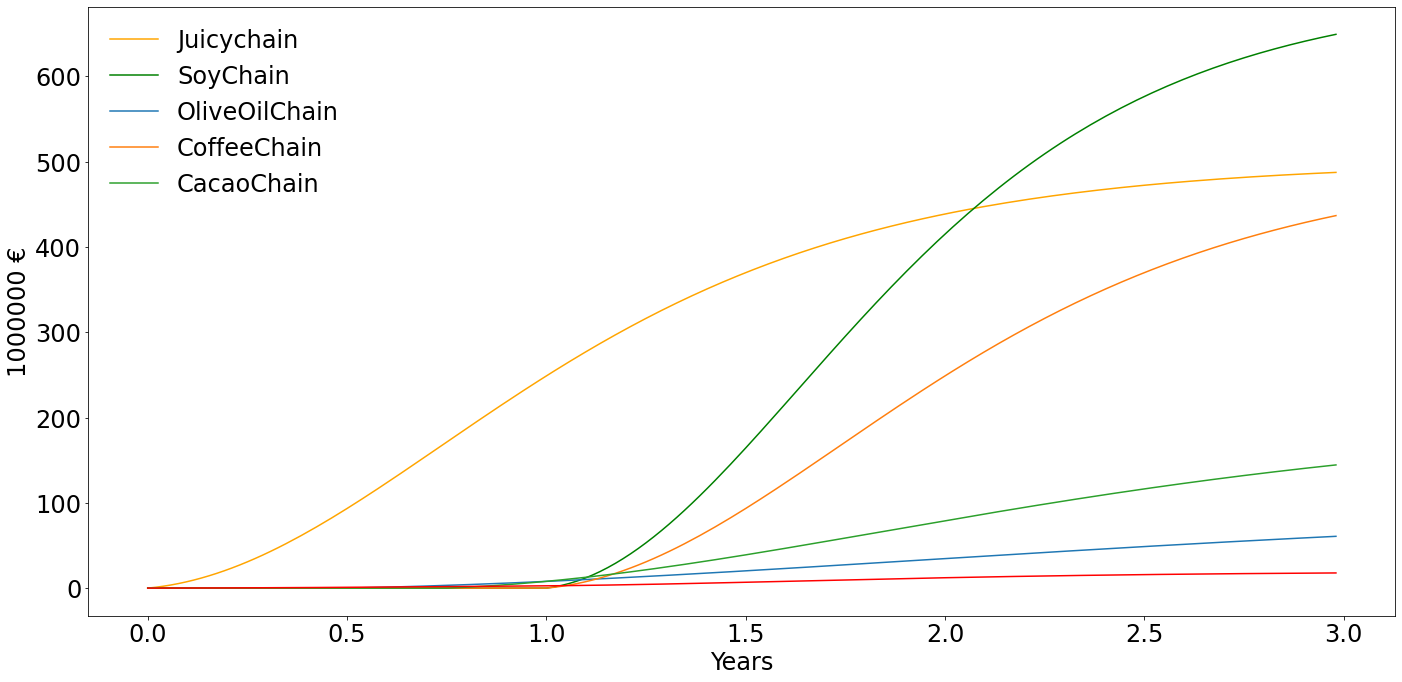

In [48]:
Juice      =       [   5000    ,   1/10  ,   0. ]
Soy        =       [   7000    ,   1/10  ,   1. ]
Fish       =       [   15000   ,   1/10  ,   0.25 ]
OliveOil   =       [   1000   ,   1/10  ,   0.5 ]
Cacao      =       [   2000    ,   1/10  ,   0.75 ]
Coffee     =       [   5000    ,   1/10  ,   1. ]


# olive oil 	12	1000
# fish 	552	15000
# cacao	18	2000

rev=[0]*S
fig=figure(figsize=(20,10))
JuicyChain=model(Juice)
plot(Years, JuicyChain[0:-2] , label="Juicychain" , color="orange")
SoyChain=model(Soy)
plot(Years, SoyChain[0:-2], label="SoyChain", color="green")
#FishChain=model(Fish)
#plot(Years, FishChain[0:-2], label="FishChain", color="blue")
OliveOilChain=model(OliveOil)
plot(Years, OliveOilChain[0:-2], label="OliveOilChain")
CoffeeChain=model(Coffee)
plot(Years, CoffeeChain[0:-2], label="CoffeeChain")
CacaoChain=model(Cacao)
plot(Years, CacaoChain[0:-2], label="CacaoChain") 
xlabel("Years")
ylabel("Investors")
legend(frameon=False)
#axes=fig.add_axes([0.13, 0.6, 0.28, 0.35])
#axes.
plot(Years, rev, color='r')
#axes.axhline(y=Threshold,color='b')
#axes.text(1.,Threshold +1,'5 Millions')
xlabel("Years")
ylabel(str(tokenscale)+" €")
tight_layout()